In [1]:
import pandas as pd
import numpy as np

In [45]:
import matplotlib.pyplot as plt

# ABOUT THIS NOTEBOOK

## Created for Kaggle playground series season 3, episode 21 - 8.26.23
This notebooks will be in two sections 1) EDA and 2) Predictions, first will mostly consist of making plots and cleaning the data. And when the data is ready we can feed to the model to prediction.

In [2]:
df = pd.read_csv('sample_submission.csv')

In [4]:
df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [12]:
df.isna().any()

id        False
target    False
O2_1      False
O2_2      False
O2_3      False
O2_4      False
O2_5      False
O2_6      False
O2_7      False
NH4_1     False
NH4_2     False
NH4_3     False
NH4_4     False
NH4_5     False
NH4_6     False
NH4_7     False
NO2_1     False
NO2_2     False
NO2_3     False
NO2_4     False
NO2_5     False
NO2_6     False
NO2_7     False
NO3_1     False
NO3_2     False
NO3_3     False
NO3_4     False
NO3_5     False
NO3_6     False
NO3_7     False
BOD5_1    False
BOD5_2    False
BOD5_3    False
BOD5_4    False
BOD5_5    False
BOD5_6    False
BOD5_7    False
dtype: bool

OK we don't have any null or na values.

### The official kaggle explanation
> This is a very different type of challenge! For this challenge, your task is to improve a dataset that is being used to train a random forest model; in other words, your submission will be training data, not predictions. A random forest model will be trained on your submission, used to make predictions, and then those predictions will be used to generate your score.

> The dataset for this competition is a synthetic dataset based off of the Dissolved oxygen prediction in river water dataset. You are free to use the original in any way that you find useful.

> Please see important information on the Evaluation tab about the model that will be trained on your submitted data.

> Good luck!

Now we have the current dataset which has only data from 7 stations and it is used to build a random forest model. __So first we need to create a Random Forest to compare the output__ and then augment the data by adding 8th station to df and running it again by the same random forest (or another) to see the differences.

Let's create a random forest model.

In [22]:
indicators = ['O2', 'NH4', 'NO2', 'NO3', 'BOD5']

In [29]:
def get_seven_stations(indicator):
    col_names = [indicator + '_' + str(i) for i in range(1, 8)]
    return col_names

In [31]:
get_seven_stations(indicators[4])

['BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']

In [27]:
oxgen_col = get_seven_stations(indicators[1])

['O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7']

In [28]:
df[oxgen_col]

,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7
0,7.500,9.000,9.545,9.265,8.110,8.430,7.150
1,13.533,40.900,8.770,9.265,6.015,10.070,7.150
2,3.710,5.420,8.770,9.265,4.550,10.070,7.150
3,8.700,8.100,9.500,9.200,5.200,8.670,6.670
4,8.050,8.650,7.960,9.265,3.290,10.070,7.150
...,...,...,...,...,...,...,...
3495,6.250,8.300,7.795,9.265,5.690,8.555,6.335
3496,6.630,6.630,8.370,7.600,0.636,8.430,7.150
3497,8.367,8.433,8.770,6.170,5.800,10.400,7.200
3498,10.000,6.630,9.545,9.265,3.290,8.980,2.310


In [39]:
np.corrcoef(df['O2_1'],df['O2_2'])

array([[1.        , 0.20475417],
       [0.20475417, 1.        ]])

In [48]:
def corr (x,y):
    return np.corrcoef(x, y) [0][1]

def show_corr(df, a, b):
    x,y = df [a], df[b]
    plt.scatter (x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b}; r: {corr (x, y) : .2f}')

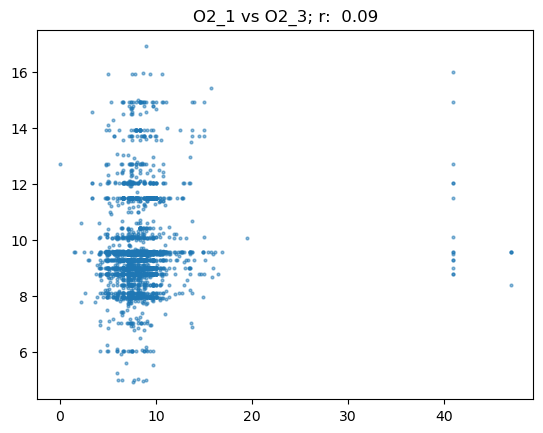

In [50]:
show_corr(df, 'O2_1','O2_3')

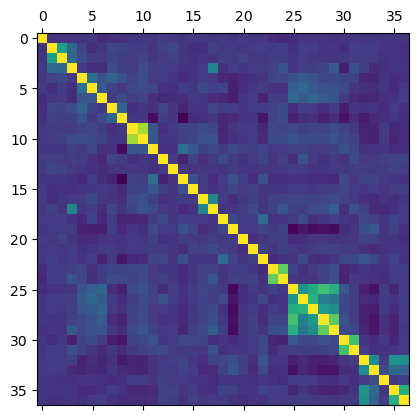

In [52]:
plt.matshow(df.corr())
plt.show()

I thought maybe there was a correlation between perhaps oxygen and nitrogen dioxide but there aren't any power connections, except for nitrate.

Let's check to TODO:

- [x] Look at the big picture.
- [x] Get the data.
- [x] Discover and visualize the data to gain insights.
- [ ] Prepare the data for Machine Learning algorithms.
- [ ] Select a model and train it.
- [ ] Fine-tune your model.
- [ ] Present your solution.
- [ ] Launch, monitor, and maintain your system.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()